In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [ ]:
@staticmethod
def factor(df):
    '''衡量买卖压力的比例
    通过taker_buy_volume和总成交量计算买卖不平衡，反映市场中的净买压或卖压。
    '''
    imbalance = 2 * df['taker_buy_volume'] / df['volume'] - 1
    return imbalance

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.001042
   Rank_IC (Spearman): -0.016852
📊 信息比率:
   IR: 0.546823
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 131013
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


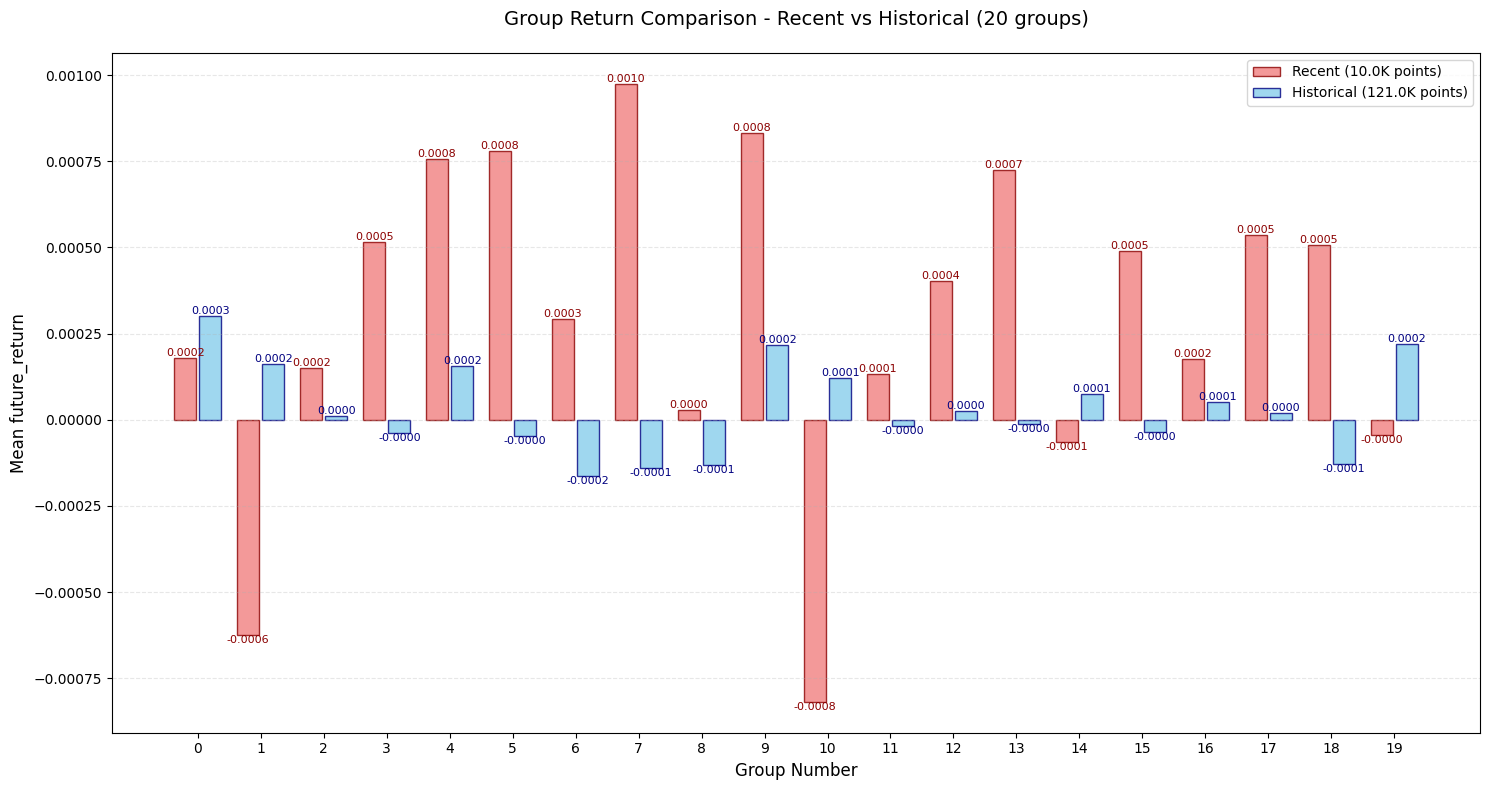

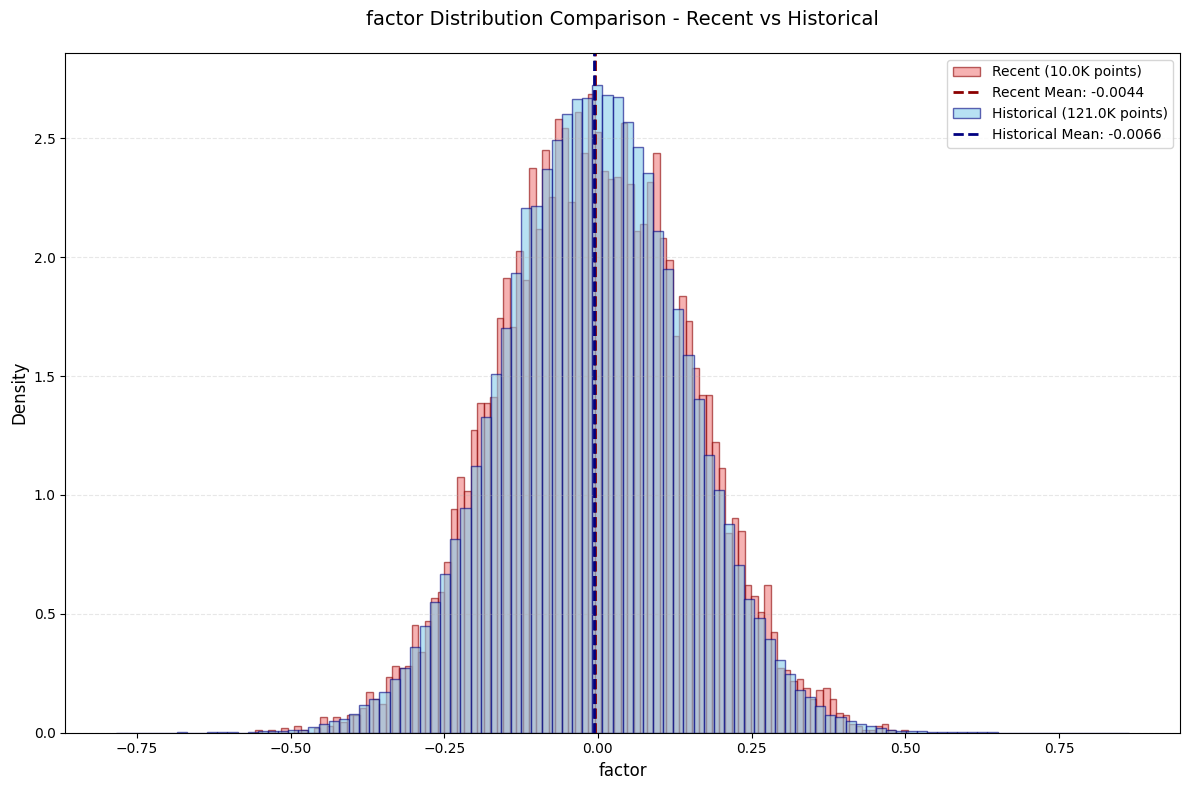

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [10]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

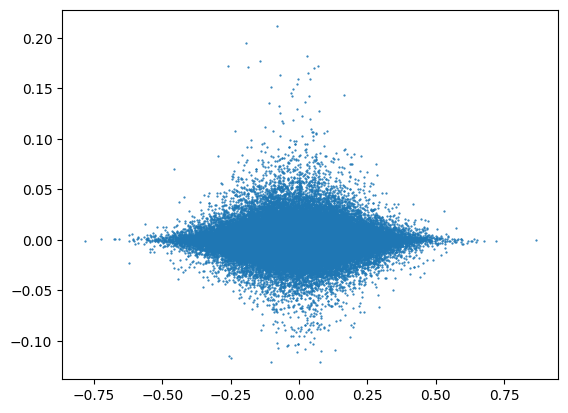

In [11]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [12]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[0.0009371898022766523,
 0.006230904726071969,
 0.0036255047757493154,
 -0.00048697640199652664,
 0.014861091327923966,
 -0.0006657481639323537,
 0.0020608745945712445,
 -0.002085275900350663,
 -0.003835992136343429,
 0.008622042091287163]

In [13]:
print(result)

{'correlation_analysis': {'IC': -0.001042076538865535, 'Rank_IC': -0.01685203163266178}, 'information_ratio': {'IR': 0.5468227145237349, 'group_correlations': [0.0009371898022766523, 0.006230904726071969, 0.0036255047757493154, -0.00048697640199652664, 0.014861091327923966, -0.0006657481639323537, 0.0020608745945712445, -0.002085275900350663, -0.003835992136343429, 0.008622042091287163], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0      -0.7840  -0.2452   -0.3095       0.0003      0.0090   6551
1      -0.2452  -0.1919   -0.2163       0.0001      0.0108   6551
2      -0.1919  -0.1568   -0.1736       0.0000      0.0108   6550
3      -0.1568  -0.1288   -0.1424       0.0000      0.0115   6551
4      -0.1288  -0.1058   -0.1171       0.0002      0.0114   6551
5      -0.1058  -0.0838   -0.0946      -0.0000      0.0123   6550
6      -0.0838  -0.0633   -0.0